In [2]:
import common

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mistat

In [4]:
import random

random.seed(123)
np.random.seed(123)

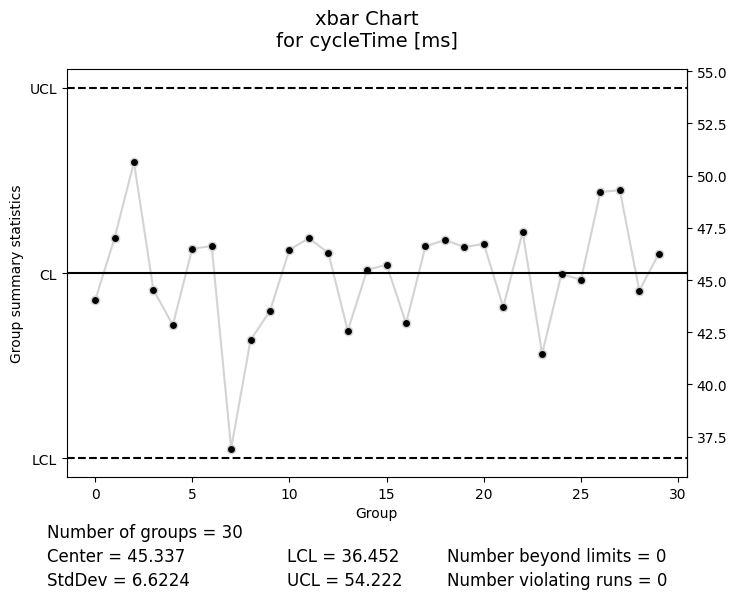

In [15]:
simulator = mistat.PistonSimulator(n_simulation=30, n_replicate=5, seed=1)
Ps = simulator.simulate()
Ps['milliseconds'] = 1000 * Ps['seconds']

cycleTime = mistat.qcc_groups(Ps['milliseconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime)

fig, ax = plt.subplots(figsize=(8, 6))
qcc.plot(title='for cycleTime [ms]', ax=ax)
common.saveFigure('control-chart-xbar.pdf')
plt.show()

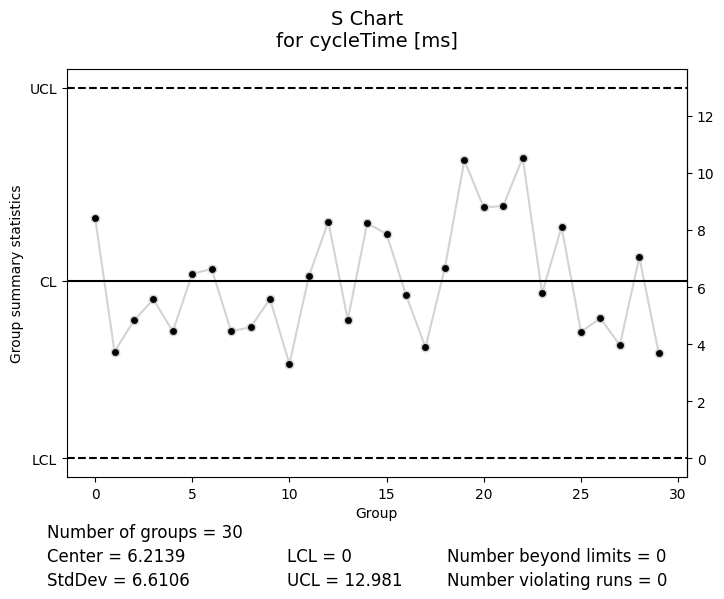

In [16]:
qcc = mistat.QualityControlChart(cycleTime, qcc_type='S')

fig, ax = plt.subplots(figsize=(8, 6))
qcc.plot(title='for cycleTime [ms]', ax=ax)
common.saveFigure('control-chart-s.pdf')
plt.show()



In [17]:
data = common.preparePistonDataset()
data

,milliseconds,group,x1,x2,x3,x4
0,60.226485,1,-1.0,-1.0,-1.0,-1.0
1,65.020360,1,-1.0,-1.0,-1.0,-1.0
2,57.302374,1,-1.0,-1.0,-1.0,-1.0
3,50.978262,1,-1.0,-1.0,-1.0,-1.0
4,56.526159,1,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...
155,68.963006,32,0.0,0.0,0.0,0.0
156,51.328098,32,0.0,0.0,0.0,0.0
157,51.372896,32,0.0,0.0,0.0,0.0
158,59.049678,32,0.0,0.0,0.0,0.0


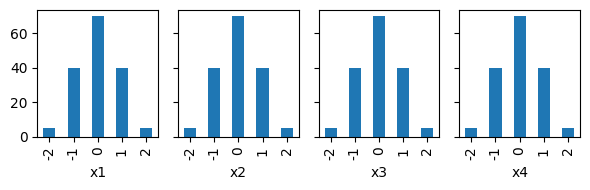

In [33]:
fig, axes = plt.subplots(ncols=4, figsize=(6, 2), sharey=True)
for i, ax in enumerate(axes, 1):
    data[f'x{i}'].value_counts(bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5], sort=False).plot.bar(ax=ax)
    ax.set_xticklabels([-2, -1, 0, 1, 2])
common.saveFigure('design-distribution.pdf')
plt.tight_layout()